# CSV loading with Multi-Threading
## Comparing Julia's CSV.jl against Python pandas and R data.table

In [1]:
Threads.nthreads()

20

In [11]:
using CSV, CSV.DataFrames #for loading csv files
using BenchmarkTools #for benchmarking load time
using StatsPlots, CategoricalArrays #for plotting

## Homogenous Dataset
This dataset contains 50M rows and 5 columns. The dataset is a simulation of apple stock prices over two decades. The columns are open, high, low and close; all columns are Floats

In [7]:
run(`R -e "library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/apple_stock_price.csv'),times=4);print(benchmark)"`)


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/apple_stock_price.csv'),times=4);print(benchmark)
Unit: seconds
 expr     min       lq     mean   median       uq     max neval
 df50 24.2036 25.63233 64.48798 49.36516 103.3436 135.018     4
> 
> 


Process(`R -e "library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/apple_stock_price.csv'),times=4);print(benchmark)"`, ProcessExited(0))

In [8]:
run(`R -e "library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/apple_stock_price.csv'),times=4);print(benchmark)"`)


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/apple_stock_price.csv'),times=4);print(benchmark)
Unit: seconds
 expr      min       lq     mean   median       uq      max neval
 df50 25.17416 27.53065 71.26937 57.95944 115.0081 143.9844     4
> 
> 


Process(`R -e "library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/apple_stock_price.csv'),times=4);print(benchmark)"`, ProcessExited(0))

In [ ]:
run(`python3 -m timeit -s "import pandas" -p "pandas.read_csv('/data/dpk1729/apple_stock_price.csv')"`)

In [5]:
@btime CSV.read("/data/dpk1729/apple_stock_price.csv", threaded=false)

  20.725 s (11612465 allocations: 5.40 GiB)


,timestamp,open,close,high,low
,String,Float64,Float64,Float64,Float64
1,2000-01-03 09:00:00.000,25.5,25.503,25.503,25.5
2,2000-01-03 09:00:00.100,25.502,25.5,25.502,25.499
3,2000-01-03 09:00:00.200,25.502,25.502,25.502,25.5
4,2000-01-03 09:00:00.300,25.503,25.499,25.503,25.499
5,2000-01-03 09:00:00.400,25.5,25.499,25.5,25.497
6,2000-01-03 09:00:00.500,25.499,25.499,25.499,25.498
7,2000-01-03 09:00:00.600,25.5,25.499,25.5,25.497
8,2000-01-03 09:00:00.700,25.5,25.499,25.5,25.497
9,2000-01-03 09:00:00.800,25.5,25.505,25.505,25.5


In [6]:
@btime CSV.read("/data/dpk1729/apple_stock_price.csv", threaded=true)

  1.975 s (5808276 allocations: 4.86 GiB)


,timestamp,open,close,high,low
,String,Float64,Float64,Float64,Float64
1,2000-01-03 09:00:00.000,25.5,25.503,25.503,25.5
2,2000-01-03 09:00:00.100,25.502,25.5,25.502,25.499
3,2000-01-03 09:00:00.200,25.502,25.502,25.502,25.5
4,2000-01-03 09:00:00.300,25.503,25.499,25.503,25.499
5,2000-01-03 09:00:00.400,25.5,25.499,25.5,25.497
6,2000-01-03 09:00:00.500,25.499,25.499,25.499,25.498
7,2000-01-03 09:00:00.600,25.5,25.499,25.5,25.497
8,2000-01-03 09:00:00.700,25.5,25.499,25.5,25.497
9,2000-01-03 09:00:00.800,25.5,25.505,25.505,25.5


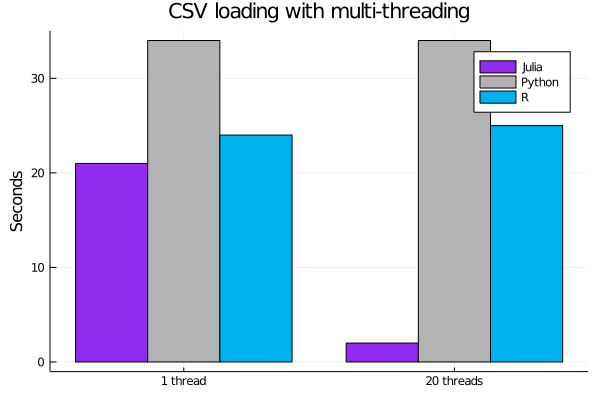

In [42]:
mn = [24,25,21,2,34,34]
#plot_times([24,25,21,2,34,34])
sx = repeat(["Python","Julia","R"], inner = 2)
nam = repeat(["1 thread", "20 threads"], outer=3)#repeat("G" .* string.(1:5), outer = 2)


groupedbar(nam, mn,  group = v, ylabel = "Seconds", 
        title = "CSV loading with multi-threading", color = [:purple2 :grey70  :deepskyblue2],legend =:best)

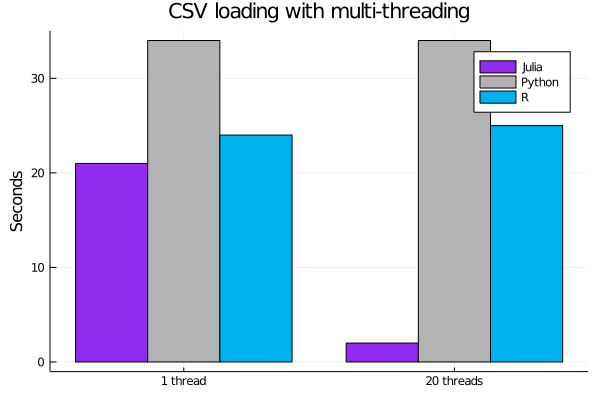

In [44]:
plot_times([21,2,24,25,34,34])

## Heterogenous Dataset

In [19]:
run(`R -e "library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/mortgage_risk.csv'),times=4);print(benchmark)"`)


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/mortgage_risk.csv'),times=4);print(benchmark)
Unit: seconds
 expr      min       lq     mean   median       uq      max neval
 df50 36.92815 37.17329 38.41245 37.79015 39.65162 41.14136     4
> 
> 


Process(`R -e "library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/mortgage_risk.csv'),times=4);print(benchmark)"`, ProcessExited(0))

In [20]:
run(`R -e "library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/mortgage_risk.csv'),times=4);print(benchmark)"`)


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/mortgage_risk.csv'),times=4);print(benchmark)
Unit: seconds
 expr      min       lq     mean   median       uq      max neval
 df50 8.940132 9.449666 10.44732 10.59404 11.44498 11.66107     4
> 
> 


Process(`R -e "library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/mortgage_risk.csv'),times=4);print(benchmark)"`, ProcessExited(0))

In [21]:
run(`python3 -m timeit -s "import pandas" -p "pandas.read_csv('/data/dpk1729/mortgage_risk.csv')"`)

1 loop, best of 5: 119 sec per loop


Process(`python3 -m timeit -s 'import pandas' -p "pandas.read_csv('/data/dpk1729/mortgage_risk.csv')"`, ProcessExited(0))

In [22]:
@btime CSV.read("/data/dpk1729/mortgage_risk.csv", threaded=false)

  111.060 s (33202 allocations: 12.96 GiB)


,Column1,sk_id_curr,amt_annuity,amt_credit,amt_goods_price,amt_income_total
,Int64,Int64,Float64⍰,Float64,Float64⍰,Float64
1,0,392090,13500.0,270000.0,270000.0,157500.0
2,1,392091,33025.5,1.125e6,1.125e6,270000.0
3,2,392092,23301.0,792477.0,661500.0,180000.0
4,3,392093,13045.5,225000.0,225000.0,135000.0
5,4,392094,42385.5,1.06543e6,913500.0,99000.0
6,5,392095,14724.0,284400.0,225000.0,69750.0
7,6,392096,13482.0,135000.0,135000.0,135000.0
8,7,392097,7731.0,113760.0,90000.0,81000.0
9,8,392098,26770.5,550467.0,387000.0,126000.0


In [23]:
@btime CSV.read("/data/dpk1729/mortgage_risk.csv", threaded=true)

  7.731 s (444907 allocations: 12.99 GiB)


,Column1,sk_id_curr,amt_annuity,amt_credit,amt_goods_price,amt_income_total
,Int64,Int64,Float64⍰,Float64,Float64⍰,Float64
1,0,392090,13500.0,270000.0,270000.0,157500.0
2,1,392091,33025.5,1.125e6,1.125e6,270000.0
3,2,392092,23301.0,792477.0,661500.0,180000.0
4,3,392093,13045.5,225000.0,225000.0,135000.0
5,4,392094,42385.5,1.06543e6,913500.0,99000.0
6,5,392095,14724.0,284400.0,225000.0,69750.0
7,6,392096,13482.0,135000.0,135000.0,135000.0
8,7,392097,7731.0,113760.0,90000.0,81000.0
9,8,392098,26770.5,550467.0,387000.0,126000.0


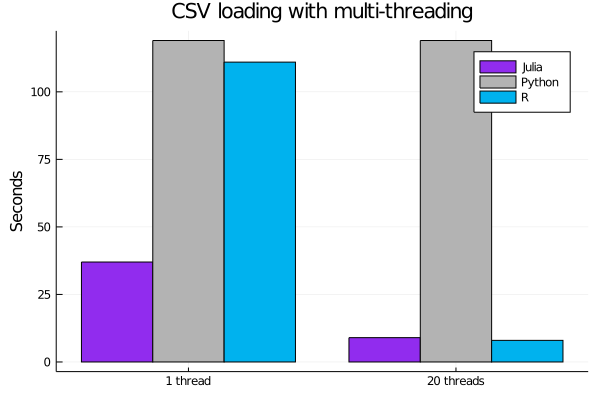

In [40]:
plot_times([37,9,111,8,119,119])

## Faany Mae

In [25]:
run(`R -e "library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/fanny_mae_acquisition.csv'),times=4);print(benchmark)"`)


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/fanny_mae_acquisition.csv'),times=4);print(benchmark)
Unit: seconds
 expr      min       lq     mean   median       uq      max neval
 df50 31.47753 31.71271 34.53063 34.63277 37.34856 37.37948     4
> 
> 


Process(`R -e "library(microbenchmark);library(data.table);setDTthreads(1);benchmark = microbenchmark(df50 = fread('/data/dpk1729/fanny_mae_acquisition.csv'),times=4);print(benchmark)"`, ProcessExited(0))

In [26]:
run(`R -e "library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/fanny_mae_acquisition.csv'),times=4);print(benchmark)"`)


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/fanny_mae_acquisition.csv'),times=4);print(benchmark)
Unit: seconds
 expr    min       lq     mean   median       uq      max neval
 df50 25.114 25.25024 27.22369 26.91845 29.19714 29.94386     4
> 
> 


Process(`R -e "library(microbenchmark);library(data.table);setDTthreads(20);benchmark = microbenchmark(df50 = fread('/data/dpk1729/fanny_mae_acquisition.csv'),times=4);print(benchmark)"`, ProcessExited(0))

In [35]:
run(`python3 -m timeit -s "import pandas" -p "pandas.read_csv('/data/dpk1729/fanny_mae_acquisition.csv', header=None, sep='|')"`)

1 loop, best of 5: 71.8 sec per loop


Process(`python3 -m timeit -s 'import pandas' -p "pandas.read_csv('/data/dpk1729/fanny_mae_acquisition.csv', header=None, sep='|')"`, ProcessExited(0))

In [33]:
@btime CSV.read("/data/dpk1729/fanny_mae_acquisition.csv", header=false, delim="|",threaded=false)

  51.318 s (1951 allocations: 15.04 GiB)


,Column1,Column2,Column3,Column4,Column5
,Int64,String,String,Float64⍰,Int64
1,100007365142,R,"JPMORGAN CHASE BANK, NA",8.0,75000
2,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000
3,100011322040,C,AMTRUST BANK,7.75,123000
4,100015192562,R,OTHER,8.5,51000
5,100015874399,C,"CITIMORTGAGE, INC.",8.75,242000
6,100017922445,C,AMTRUST BANK,8.25,240000
7,100019048933,C,OTHER,7.5,52000
8,100020205696,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,7.625,225000
9,100021703104,C,"JPMORGAN CHASE BANK, NA",8.0,120000


In [34]:
@btime CSV.read("/data/dpk1729/fanny_mae_acquisition.csv",header=false, delim="|", threaded=true)

  8.570 s (12243 allocations: 15.04 GiB)


,Column1,Column2,Column3,Column4,Column5
,Int64,String,String,Float64⍰,Int64
1,100007365142,R,"JPMORGAN CHASE BANK, NA",8.0,75000
2,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000
3,100011322040,C,AMTRUST BANK,7.75,123000
4,100015192562,R,OTHER,8.5,51000
5,100015874399,C,"CITIMORTGAGE, INC.",8.75,242000
6,100017922445,C,AMTRUST BANK,8.25,240000
7,100019048933,C,OTHER,7.5,52000
8,100020205696,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,7.625,225000
9,100021703104,C,"JPMORGAN CHASE BANK, NA",8.0,120000


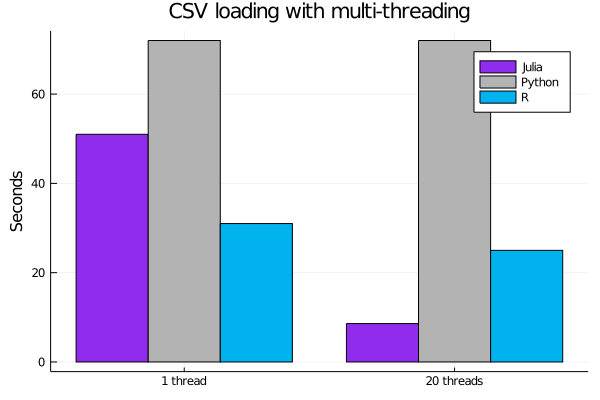

In [37]:
plot_times([31,25,51,8.6,72,72])

In [30]:
v

6-element CategoricalArray{String,1,UInt32}:
 "R"
 "R"
 "Julia"
 "Julia"
 "Python"
 "Python"

In [38]:
function plot_times(t_array)
    group_name = CategoricalArray(repeat(["Julia","R", "Python"], inner = 2), ordered=true)
    names_ = repeat(["1 thread", "20 threads"], outer=3)
    groupedbar(names_, t_array,  group = group_name, ylabel = "Seconds", 
        title = "CSV loading with multi-threading", color = [:purple2 :grey70  :deepskyblue2],legend =:best)
end

plot_times (generic function with 1 method)

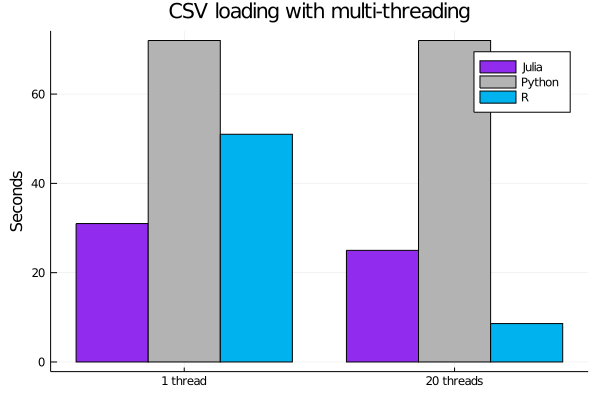

In [39]:
plot_times([31,25,51,8.6,72,72])